<CENTER><img src="../../images/ATLASOD.gif" style="width:50%"></CENTER>

# Find the Z boson yourself!
This notebook uses ATLAS Open Data http://opendata.atlas.cern to show you the steps to find the Z boson.

The whole notebook takes less than an hour to follow through.

Notebooks are web applications that allow you to create and share documents that can contain:
1. live code
2. visualisations
3. narrative text

Notebooks are a perfect platform to develop in Python, since you'll need exactly those 3 things: code, visualisations and narrative text!

By the end of this notebook you will be able to:
1. find the Z boson yourself
2. know some things you can change to improve your measurement

<CENTER><img src="images/feynman_diagrams/Zee_feynman.png" style="width:40%"></CENTER>

<a id='contents'></a>

Contents: 

[Running a Jupyter notebook](#running) <br />
[To setup everytime](#setupeverytime) <br />
[Where's my data](#fraction) <br />
[Calculate that invariant mass!](#good_leptons) <br />
[Can we process the data yet?!](#load_data) <br />
[Plot Data](#plot_data) <br />
[Your tasks](#tasks) <br />
[Going further](#going_further) <br />

<a id='running'></a>

## Running a Jupyter notebook

To run the whole Jupyter notebook, in the top menu click Cell -> Run All.

To propagate a change you've made to a piece of code, click Cell -> Run All Below.

You can also run a single code cell, by using the keyboard shortcut Shift+Enter.

[Back to contents](#contents)

<a id='setupeverytime'></a>

## To setup everytime
We're going to be using a number of tools to help us:
* urllib: let us download files
* uproot: lets us read .root files typically used in particle physics into data formats used in Python
* pandas: lets us store data as dataframes, a format widely used in Python
* numpy: provides numerical calculations such as histogramming
* matplotlib: common tool for making plots, figures, images, visualisations

In [3]:
import urllib.request # for downloading files
import pandas as pd # to store data as dataframes
import numpy as np # for numerical calculations such as histogramming
import uproot3 # to read .root files as dataframes
import matplotlib.pyplot as plt # for plotting

/tmp/ipykernel_651/2988090986.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # to store data as dataframes


<a id='fraction'></a>

## Where's my data?

In [4]:
filename = 'data_D.exactly2lep.root'
url = 'https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/exactly2lep/Data/'+filename
urllib.request.urlretrieve(url, filename)

('data_D.exactly2lep.root', <http.client.HTTPMessage at 0x7fce4308faf0>)

[Back to contents](#contents)

<a id='good_leptons'></a>

## Calculate that invariant mass!

Fill in the missing lines to calculate invariant mass.

1. If the energy of the 2 leptons are *lep_E[0]* and *lep_E[1]*, write the sum of energy, *sumE*
2. Write the sum of x-momentum, *sumpx*
3. Do the same for y and z momenta (*sumpy* and *sumpz*)
4. Now you have the x,y,z components sumpx,sumpy,sumpz. The vector **sump** = (sumpx,sumpy,sumpz). Write the magnitude of total momentum, *sump*.

The invariant mass, *M*, of a parent particle decaying to two daughter particles is related to properties of the daughter particles by the formula:

$$M^2=E^2-p^2,$$

where *E* is the total energy of the daughter particles, and *p* is the magnitude of the vector sum of the momenta of the daughter particles. This is written in natural units with *c*=1.

5. Write *Mll* using this formula for invariant mass

In [5]:
# calculate dilepton invariant mass
def calc_mll(lep_pt,lep_eta,lep_phi,lep_E): # lepton pt,eta,phi,energy
    
    # The first lepton is [0], next lepton is [1] etc
    # get the energy of first lepton by using lep_E[0]
    # or the phi angle of the second lepton with lep_phi[1]

    # Some useful mathematical functions:
    # For a square root, follow the next example
    # Two = np.sqrt(4)
    # To calculate a power, use
    # Nine = pow(3,2)
    
    # Let's calculate first the sum of the energies of both leptons
    # sumE = sum of energy
    sumE = 
    
    # Here we are calculating the three x,y,z components of the leptons momentum.
    px_0 = lep_pt[0]*np.cos(lep_phi[0]) # x-momentum of 0th lepton
    px_1 = lep_pt[1]*np.cos(lep_phi[1]) # x-momentum of 1st lepton
    py_0 = lep_pt[0]*np.sin(lep_phi[0]) # y-momentum of 0th lepton
    py_1 = lep_pt[1]*np.sin(lep_phi[1]) # y-momentum of 1st lepton
    pz_0 = lep_pt[0]*np.sinh(lep_eta[0]) # z-momentum of 0th lepton
    pz_1 = lep_pt[1]*np.sinh(lep_eta[1]) # z-momentum of 1st lepton
    
    # Let's calculate the sum of momenta in every direction
    # sumpx = sum of x-momenta
    sumpx = 
    
    # sumpy = sum of y-momenta
    sumpy = 
    
    # sumpz = sum of z-momenta
    sumpz = 
    
    # sump = magnitude of total momentum vector. Remember it's a vector!
    sump = 
    
    # Mll = invariant mass from M^2 = E^2 - p^2
    Mll = 
    
    return Mll/1000 # divide by 1000 to go from MeV to GeV
    

<a id='load_data'></a>

## Processing of the data

In [38]:
data_all = pd.DataFrame() # define empty pandas DataFrame to hold all data for this sample
tree = uproot3.open(filename)["mini"] # open the tree called mini
numevents = uproot3.numentries(filename, "mini") # number of events

# Create a list to store individual DataFrames
dfs = []

for data in tree.iterate(['lep_pt','lep_eta','lep_phi','lep_E'], 
                         outputtype=pd.DataFrame, # choose output type as pandas DataFrame
                         entrystop=numevents*0.00005): # stop after fraction of events we want to process

    # calculation of 2-lepton invariant mass                                                                                                                                      
    data['mll'] = np.vectorize(calc_mll)(data.lep_pt, data.lep_eta, data.lep_phi, data.lep_E)
    
    #print(data['mll'])
    #data_all = data_all.append(data) # append dataframe from this batch to the dataframe for the whole sample
    # Append the DataFrame to the list
    dfs.append(data)

# Concatenate all DataFrames in the list
data_all = pd.concat(dfs, ignore_index=True)

[Back to contents](#contents)

<a id='plot_data'></a>

## Function to plot Data

Text(0, 0.5, 'Events')

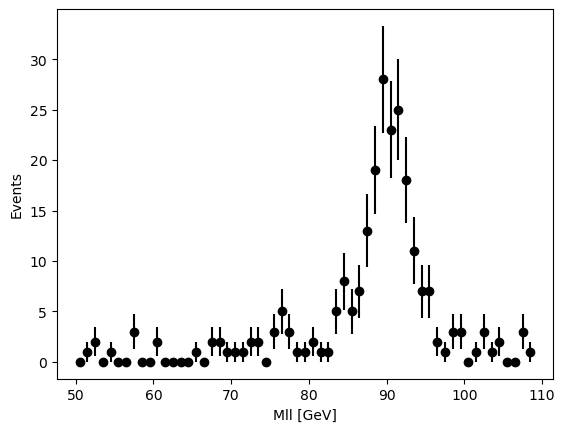

In [40]:
bin_edges = np.arange(start=50, # The interval includes this value
                      stop=110, # The interval doesn't include this value
                      step=1.0 ) # Spacing between values
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2 # central values of each bin

# histogram the data
data_x,_ = np.histogram(data_all['mll'], bins=bin_edges ) 

# statistical error on the data
data_x_errors = np.sqrt(data_x)

# plot the data points
plt.errorbar(x=bin_centres, 
                   y=data_x, 
                   yerr=data_x_errors,
                   fmt='ko' ) # 'k' means black and 'o' is for circles

# x-axis label
plt.xlabel('Mll [GeV]')

# y-axis label
plt.ylabel('Events')

# make the y-axis log scale
#plt.yscale('log')

Compare this with "Total Cross Section" as a function of "Center of Mass Energy".

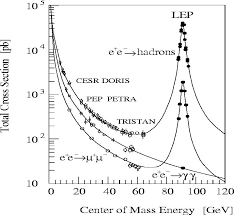

<a id='tasks'></a>

## Your tasks

1. Write the invariant mass formula, $M^2=E^2-p^2$.
2. Run the histogram part and identify the Z boson peak.
3. Calculate the mass of the Z boson using the histogram. With which precision can you do it?
4. Currently we are using only a small fraction of the available data. Increase the fraction of data by a factor 100 and re-run. For that you need to go back to the data processing step.
5. Play with the range and number of bins of the histogram. Can you do a better measurement of the Z boson mass?
6. Now modify the code to use all the data available.
7. There are additional particles hidden in this dataset. Can you find them? Which are their masses? Try to identify them.
8. Tip: Changing the Y-axis to logarithmic scale can be useful for this ;)

[Back to contents](#contents)

Finding the Z boson in ATLAS data is a case of calculating invariant mass and plotting a range up to about 100 GeV. The Z boson then shows up in your graph!

Hopefully you've enjoyed finding the Z boson yourself!

<a id='going_further'></a>

[Back to contents](#contents)